# New York Airbnb EDA Project

Introduction

This project performs Exploratory Data Analysis (EDA) on the New York Airbnb listings dataset (2024). The goal is to uncover insights about pricing, room types, availability, and neighborhood trends across New York City boroughs.

Contents:

1. Data Loading
2. Data Cleaning
3. Univariate Analysis
4. Feature Engineering
5. Bivariate Analysis
6. Geographical Analysis
7. Summary of Key Findings

### 1. Data Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set visualization style
sns.set(style='whitegrid')

# Load the dataset
df = pd.read_csv('new_york_listing_2024.csv')  # Update path if needed

# Show dataset shape and first few rows
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (20770, 22)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
3,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
4,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1


In [4]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
20765,2.473690e+07,Rental unit in New York · ★4.75 · 1 bedroom · ...,186680487,Henry D,Manhattan,Lower East Side,40.711380,-73.991560,Private room,45.0,...,29/09/23,1.81,1.0,157.0,12.0,No License,4.75,1,1,1
20766,2.835711e+06,Rental unit in New York · ★4.46 · 1 bedroom · ...,3237504,Aspen,Manhattan,Greenwich Village,40.730580,-74.000700,Entire home/apt,105.0,...,01/07/23,0.48,1.0,0.0,1.0,No License,4.46,1,2,1
20767,5.182527e+07,Rental unit in New York · ★4.93 · 1 bedroom · ...,304317395,Jeff,Manhattan,Hell's Kitchen,40.757350,-73.993430,Entire home/apt,299.0,...,08/12/23,2.09,1.0,0.0,27.0,No License,4.93,1,1,1
20768,7.830000e+17,Rental unit in New York · ★5.0 · 1 bedroom · 1...,163083101,Marissa,Manhattan,Chinatown,40.713750,-73.991470,Entire home/apt,115.0,...,17/09/23,0.91,1.0,363.0,7.0,No License,5,1,1,1
20769,5.660000e+17,Rental unit in Queens · ★4.89 · 1 bedroom · 1 ...,93827372,Glenroy,Queens,Rosedale,40.658874,-73.728651,Private room,102.0,...,10/12/23,4.50,1.0,0.0,62.0,OSE-STRREG-0000513,4.89,1,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20770 non-null  float64
 1   name                            20770 non-null  object 
 2   host_id                         20770 non-null  int64  
 3   host_name                       20770 non-null  object 
 4   neighbourhood_group             20770 non-null  object 
 5   neighbourhood                   20763 non-null  object 
 6   latitude                        20763 non-null  float64
 7   longitude                       20763 non-null  float64
 8   room_type                       20763 non-null  object 
 9   price                           20736 non-null  float64
 10  minimum_nights                  20763 non-null  float64
 11  number_of_reviews               20763 non-null  float64
 12  last_review                     

In [6]:
#Statistical summary of the dataset
df.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
count,2.077000e+04,20770,2.077000e+04,20770,20770,20763,20763.000000,20763.000000,20763,20736.000000,...,20763,20763.000000,20763.000000,20763.000000,20763.000000,20770,20770,20770,20770.000000,20770
unique,NaN,9836,NaN,5815,5,221,NaN,NaN,4,NaN,...,1878,NaN,NaN,NaN,NaN,879,162,12,NaN,17
top,NaN,Rental unit in New York · 1 bedroom · 1 bed · ...,NaN,Jeniffer,Manhattan,Bedford-Stuyvesant,NaN,NaN,Entire home/apt,NaN,...,04/09/23,NaN,NaN,NaN,NaN,No License,No rating,1,NaN,1
freq,NaN,409,NaN,187,8050,1583,NaN,NaN,11555,NaN,...,326,NaN,NaN,NaN,NaN,17579,3595,13445,NaN,17026
mean,3.033858e+17,NaN,1.749049e+08,NaN,NaN,NaN,40.726821,-73.939179,NaN,187.714940,...,NaN,1.257589,18.866686,206.067957,10.848962,NaN,NaN,NaN,1.723592,NaN
std,3.901221e+17,NaN,1.725657e+08,NaN,NaN,NaN,0.060293,0.061403,NaN,1023.245124,...,NaN,1.904472,70.921443,135.077259,21.354876,NaN,NaN,NaN,1.211993,NaN
min,2.595000e+03,NaN,1.678000e+03,NaN,NaN,NaN,40.500314,-74.249840,NaN,10.000000,...,NaN,0.010000,1.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.707260e+07,NaN,2.041184e+07,NaN,NaN,NaN,40.684159,-73.980755,NaN,80.000000,...,NaN,0.210000,1.000000,87.000000,1.000000,NaN,NaN,NaN,1.000000,NaN
50%,4.992852e+07,NaN,1.086990e+08,NaN,NaN,NaN,40.722890,-73.949597,NaN,125.000000,...,NaN,0.650000,2.000000,215.000000,3.000000,NaN,NaN,NaN,1.000000,NaN
75%,7.220000e+17,NaN,3.143997e+08,NaN,NaN,NaN,40.763106,-73.917475,NaN,199.000000,...,NaN,1.800000,5.000000,353.000000,15.000000,NaN,NaN,NaN,2.000000,NaN


## 2. Data Cleaning

In [7]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
id                                 0
name                               0
host_id                            0
host_name                          0
neighbourhood_group                0
neighbourhood                      7
latitude                           7
longitude                          7
room_type                          7
price                             34
minimum_nights                     7
number_of_reviews                  7
last_review                        7
reviews_per_month                  7
calculated_host_listings_count     7
availability_365                   7
number_of_reviews_ltm              7
license                            0
rating                             0
bedrooms                           0
beds                               0
baths                              0
dtype: int64


In [8]:
# Drop rows with missing values in important columns
print("Dropping rows with missing values in 'last_review', 'reviews_per_month', and 'rating'...")
rows_before = df.shape[0]
df = df.dropna(subset=['last_review', 'reviews_per_month', 'rating'])
rows_after = df.shape[0]
print(f"Rows before: {rows_before}")
print(f"Rows after: {rows_after}")

Dropping rows with missing values in 'last_review', 'reviews_per_month', and 'rating'...
Rows before: 20770
Rows after: 20763


In [9]:
# Remove duplicates
print("Removing duplicate rows...")
duplicates = df.duplicated().sum()
print(f"Duplicates found: {duplicates}")
df = df.drop_duplicates()

Removing duplicate rows...
Duplicates found: 12


In [10]:
# Check for duplicates again
print("Checking for duplicates after removal...")
print("Duplicates after removal:")
df.duplicated().sum()

Checking for duplicates after removal...
Duplicates after removal:


np.int64(0)

In [11]:
# Convert 'last_review' to datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

C:\Users\rakes\AppData\Local\Temp\ipykernel_19928\3576447655.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')


In [12]:
print(df['last_review'].dtype)  # Check the data type of 'last_review'
print(df['last_review'].head())  # Check the first few values of 'last_review'

datetime64[ns]
0   2015-12-20
1   2023-01-05
2   2023-12-18
3   2023-09-17
4   2023-03-12
Name: last_review, dtype: datetime64[ns]


In [13]:
# Convert 'rating' to numeric (already done by dropna but safe)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [14]:
df.dtypes

id                                       float64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                    float64
minimum_nights                           float64
number_of_reviews                        float64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count           float64
availability_365                         float64
number_of_reviews_ltm                    float64
license                                   object
rating                                   float64
bedrooms                                  object
beds                

In [15]:
# Typing the columns to the correct data types

df['id'] = df['id'].astype('object')
df['host_id'] = df['host_id'].astype('object')

In [16]:
df.shape

(20751, 22)

## 3. Univariate Analysis

 - Price Distribution

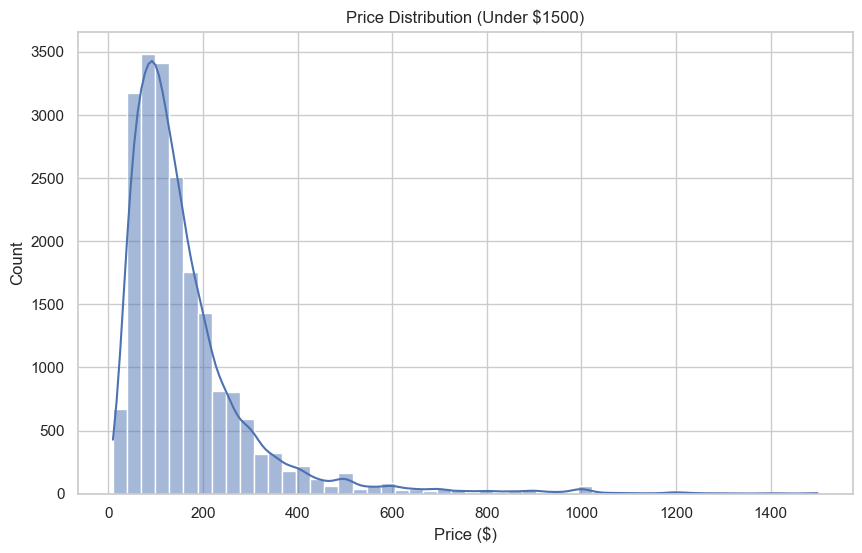

In [2]:
# Price distribution (excluding extreme outliers)
plt.figure(figsize=(10,6))
sns.histplot(df[df['price'] < 1500]['price'], bins=50, kde=True)
plt.title('Price Distribution (Under $1500)')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show()

 - Availability Distribution

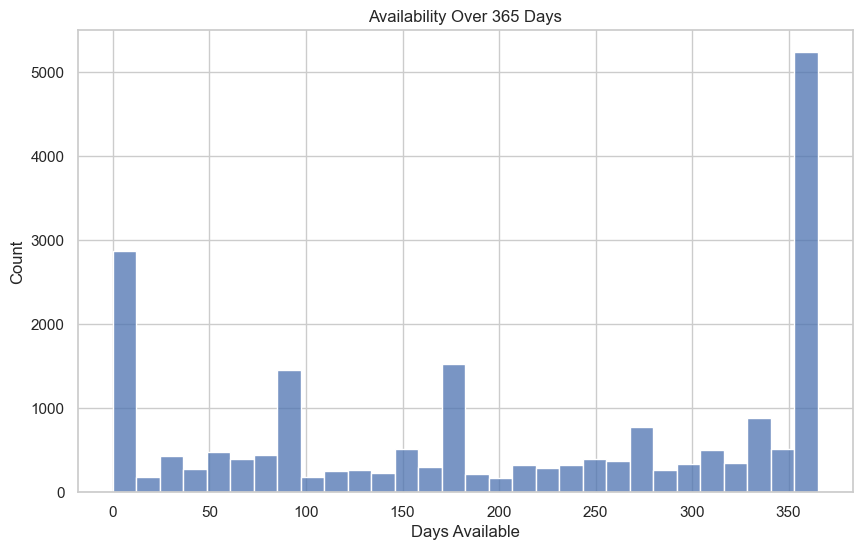

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(df['availability_365'], bins=30, kde=False)
plt.title('Availability Over 365 Days')
plt.xlabel('Days Available')
plt.ylabel('Count')
plt.show()

 - Room Type Counts

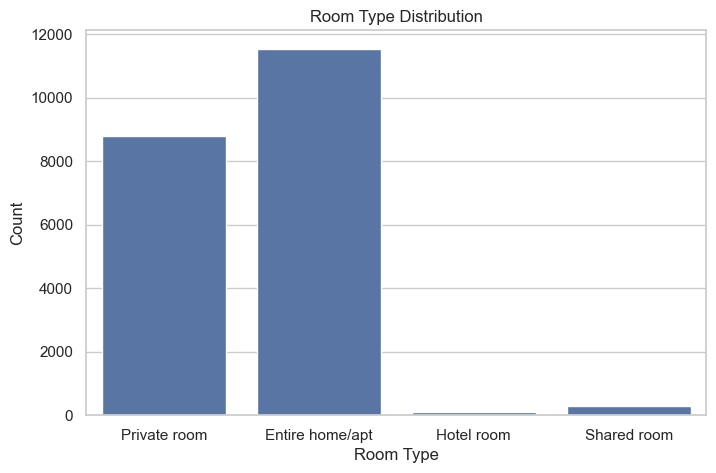

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x='room_type', data=df)
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

## 4. Feature Engineering

In [21]:
# Create price per bed feature
df['price_per_bed'] = df['price'] / df['beds'].replace(0, np.nan)
df['price_per_bed'] = df['price_per_bed'].fillna(df['price'])  # If beds=0, fallback to price

## 5. Bivariate Analysis

 - Average Price by Borough

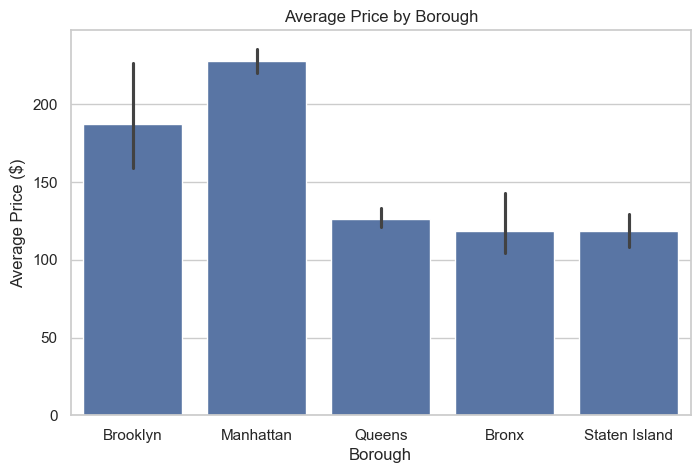

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(x='neighbourhood_group', y='price', data=df)
plt.title('Average Price by Borough')
plt.xlabel('Borough')
plt.ylabel('Average Price ($)')
plt.show()

 - Average Price Per Bed by Borough

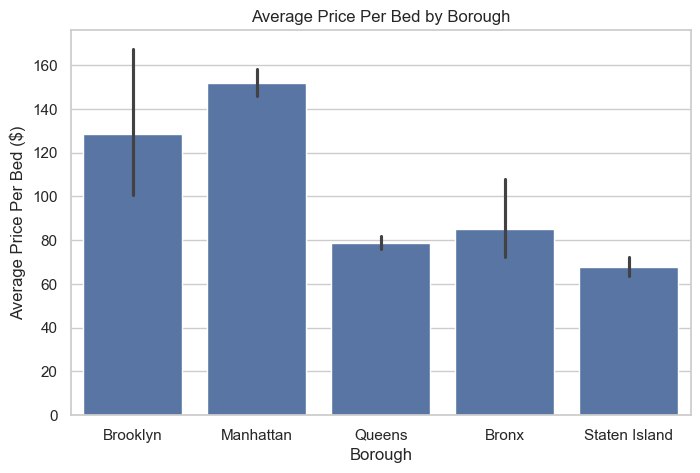

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(x='neighbourhood_group', y='price_per_bed', data=df)
plt.title('Average Price Per Bed by Borough')
plt.xlabel('Borough')
plt.ylabel('Average Price Per Bed ($)')
plt.show()

 - Price Distribution by Room Type

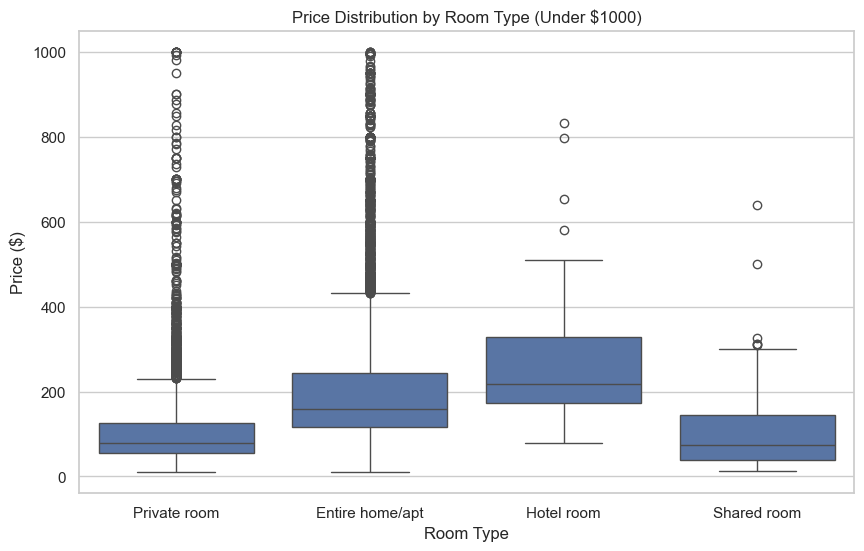

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x='room_type', y='price', data=df[df['price'] < 1000])
plt.title('Price Distribution by Room Type (Under $1000)')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.show()

 - Number of Reviews vs Price

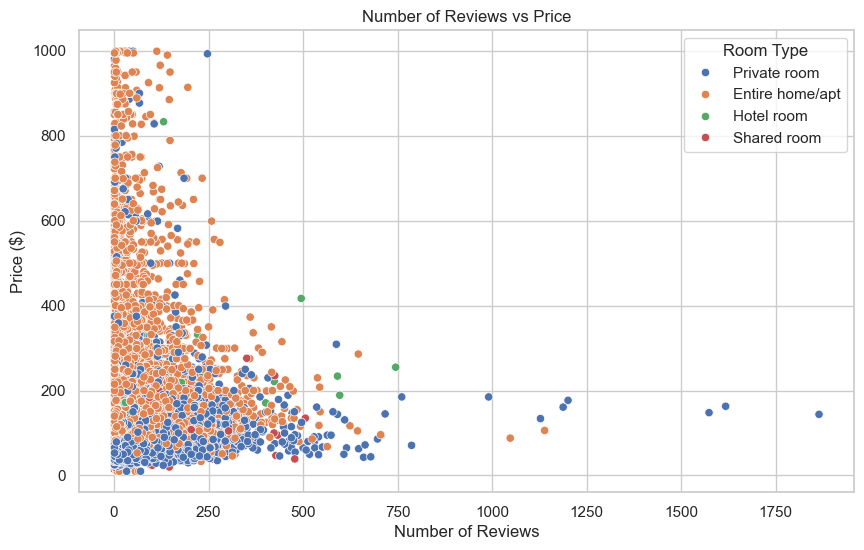

In [5]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='number_of_reviews', y='price', hue='room_type', data=df[df['price'] < 1000])
plt.title('Number of Reviews vs Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Price ($)')
plt.legend(title='Room Type')
plt.show()

## 6. Geographical Analysis

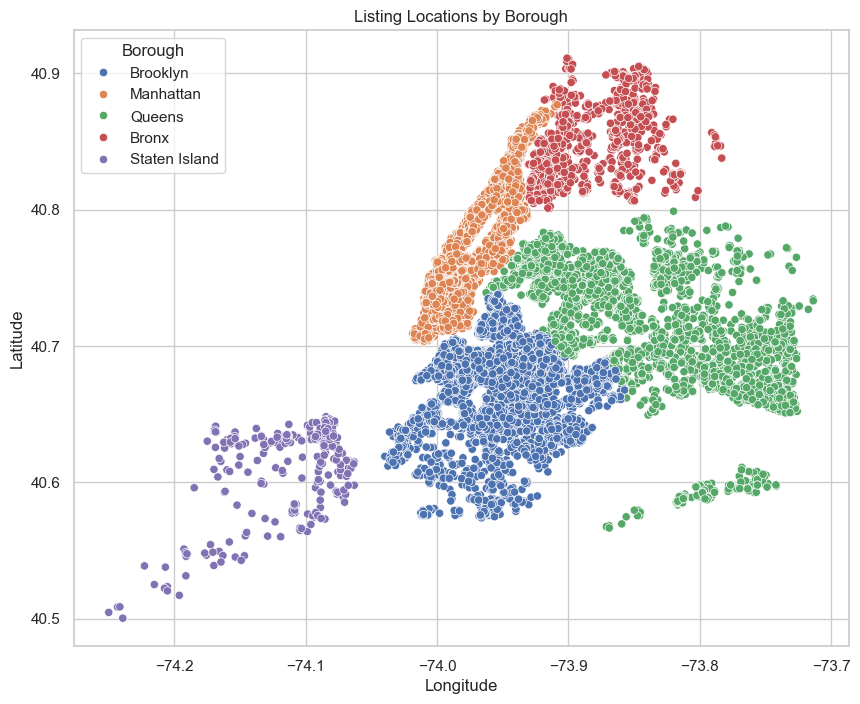

In [3]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df)
plt.title('Listing Locations by Borough')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Borough')
plt.show()

 - The following correlation matrix and heatmap summarize the relationships between key numerical features in the dataset.

<Figure size 800x600 with 0 Axes>

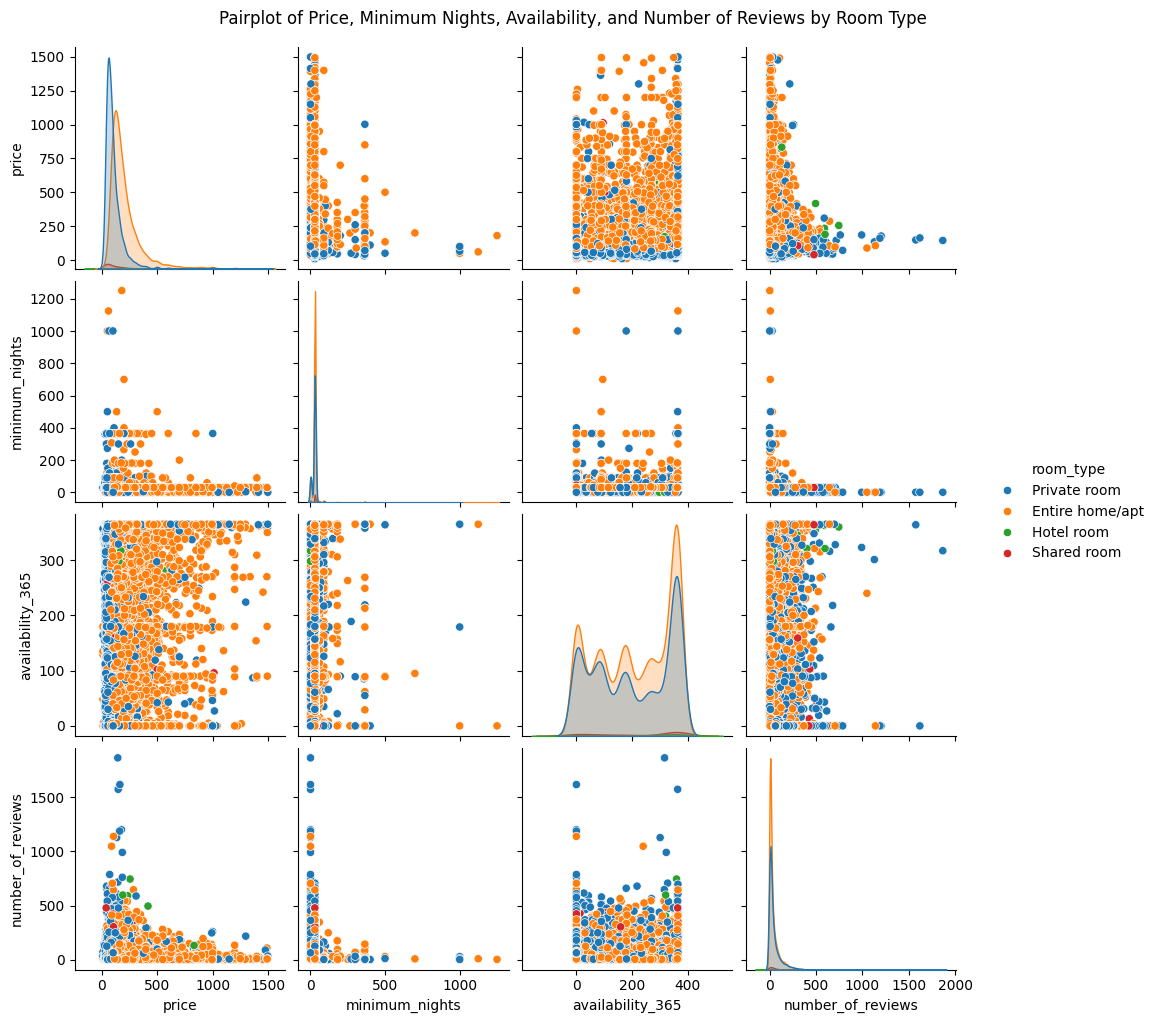

In [32]:
# Correlation matrix
plt.figure(figsize=(8, 6))
sns.pairplot(data=df, vars=['price', 'minimum_nights', 'availability_365', 'number_of_reviews'], hue='room_type')
plt.suptitle('Pairplot of Price, Minimum Nights, Availability, and Number of Reviews by Room Type', y=1.02)
plt.show()

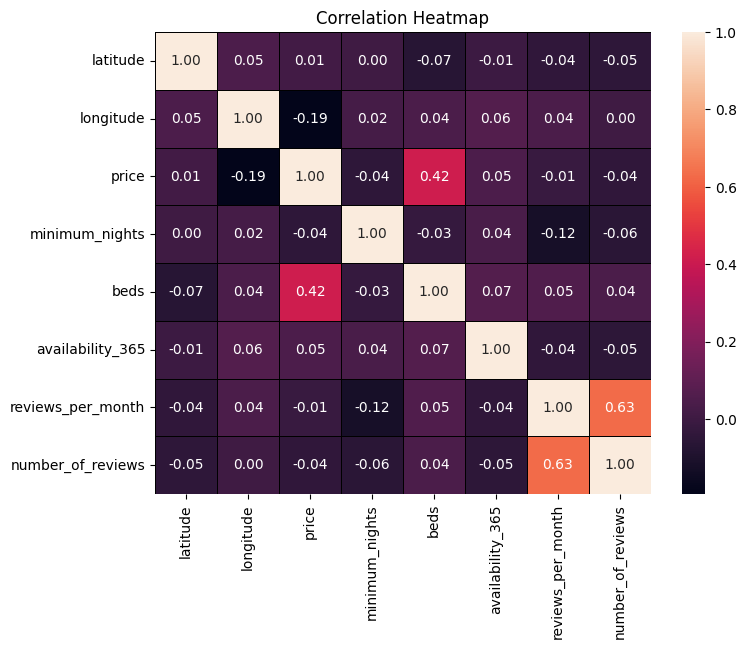

In [43]:
# heat map - correlation matrix

corr = df[['latitude', 'longitude', 'price', 'minimum_nights','beds', 'availability_365', 'reviews_per_month', 'number_of_reviews']].corr()
corr

plt.figure(figsize=(8, 6))
sns.heatmap(data=corr, annot=True, fmt='.2f', linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap')    
plt.show()

## Correlation Matrix Insights
The correlation matrix and heatmap above reveal the relationships between key numerical features in the dataset:

- **Price** shows a moderate positive correlation with **number of bedrooms** and **number of beds**, confirming that larger listings tend to be more expensive.

- **Availability_365** has a weak negative correlation with price, suggesting that more expensive listings may be booked more often (less available).

- **Number of reviews** and **reviews per month** have low correlation with price, indicating price does not strongly affect review frequency.

- **Rating** is only weakly correlated with other features, suggesting guest satisfaction is relatively independent of price, location, or size.

## 7. Summary of Key Findings

- **Manhattan** has the highest average listing price, while **Staten Island** has the lowest.

- **Private rooms** are most prevalent in Brooklyn and Queens, whereas **entire homes/apartments** dominate in Manhattan.

- Listings with more **bedrooms** and **beds** generally command higher prices.

- **Availability** is highest for listings in Queens and lowest in Manhattan.

- **High-priced listings** are geographically clustered in central Manhattan.

- **Outliers** exist in both price and availability, indicating some extreme or unique cases.

- **Many listings require a minimum stay of 30 nights**, but there is wide variability across boroughs and room types.

- The **number of reviews** is not strongly correlated with price, but some room types and neighborhoods tend to get more reviews.

- **Spatial analysis** shows dense clusters of listings in Manhattan and Brooklyn, with more affordable options in Queens and The Bronx.

- **Feature engineering** (price per bed) reveals that some neighborhoods offer better value than others.

- **Licensing status** varies, with many listings showing “No License” or “Exempt.”